<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/Backtesting_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Double Exponential Moving Average (DEMA) to determine when to buy and sell stock
#Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2020-01-01', end='2021-03-01')
df2 = web.DataReader('^GSPC',data_source='yahoo',start='2020-01-01', end='2021-03-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385
...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


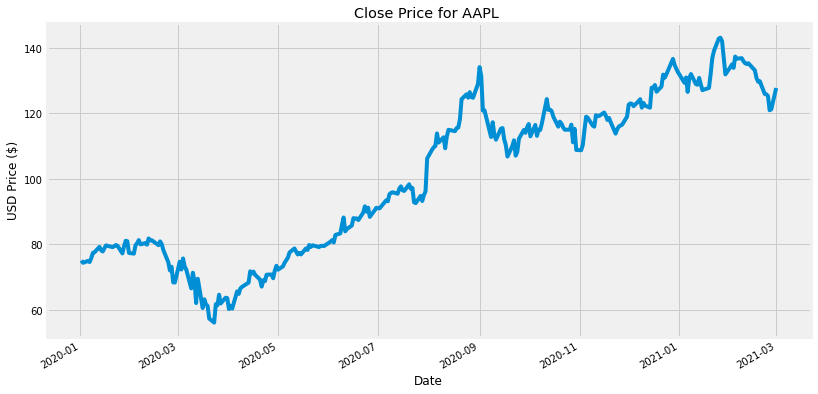

In [ ]:
#Visually show the close price
df['Close'].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('Close Price for AAPL ')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

In [ ]:
#Create a function to calculate the Double Exponential Moving Average (DEMA)
def DEMA(data, time_period, column):
  #Calculate the Exponential Moving Average for some time_period (in days)
  EMA = data[column].ewm(span=time_period, adjust=False).mean()
  #Calculate the DEMA
  DEMA = 2*EMA - EMA.ewm(span=time_period, adjust=False).mean()
  return DEMA

In [ ]:
df['DEMA_short'] = DEMA(df, 20, 'Close') #Store the short term DEMA
df['DEMA_long'] = DEMA(df, 50, 'Close') #Store the long term DEMA

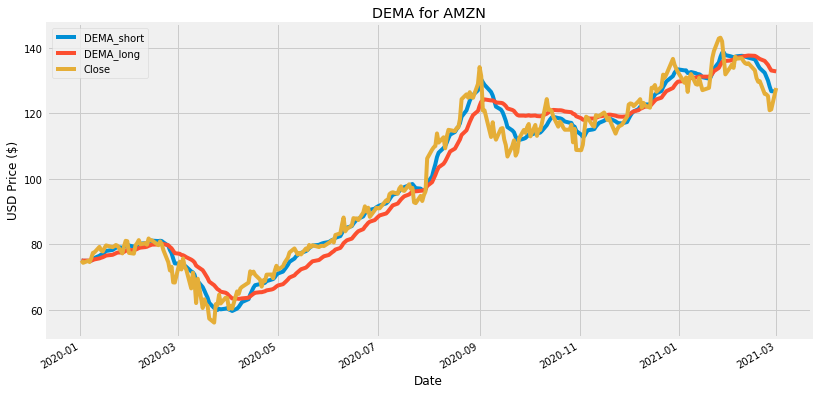

In [ ]:
#Plot the chart
#Create a list of columns to keep
column_list = ['DEMA_short', 'DEMA_long', 'Close']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('DEMA for AMZN')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

In [ ]:
def DEMA_Strategy(data):
  buy_list = [] #Create a list to store the price at which to buy
  sell_list = [] #Create a list to store the price at which to sell
  flag =  False #Create a flag to determine when the indicators cross
  #Loop through the data
  for i in range(0,len(data)):
      #Check if the Short Term DEMA crosses above the Long Term DEMA
      if data['DEMA_short'][i]  > data['DEMA_long'][i] and flag == False:
          buy_list.append(data['Close'][i])
          sell_list.append(np.nan)
          flag = True
      #Check if the Short Term DEMA crosses below the Long Term DEMA    
      elif data['DEMA_short'][i]  < data['DEMA_long'][i] and flag == True:
          buy_list.append(np.nan)
          sell_list.append(data['Close'][i])
          flag = False
      else:#Else they didn't cross
          buy_list.append(np.nan)
          sell_list.append(np.nan)
  #Store the Buy and Sell signals in the data set
  data['Buy'] = buy_list
  data['Sell'] = sell_list

In [ ]:
#Run the Strategy to get the buy and sell signals
DEMA_Strategy(df)

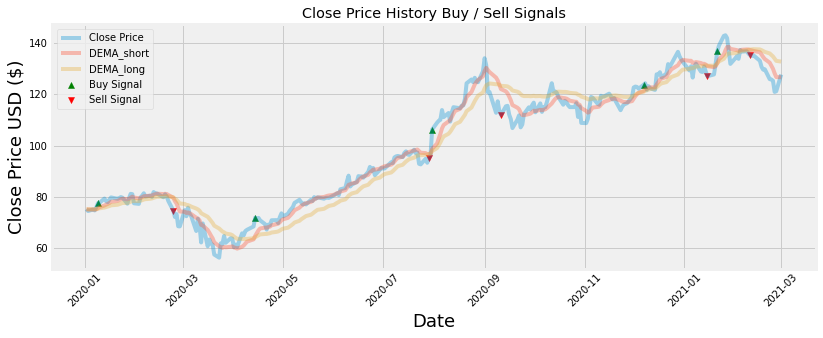

In [ ]:
# Visually Show The Stock Buy and Sell Signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1) #Plot the buy signal
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1) #Plot the sell signal
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( df['DEMA_short'],  label='DEMA_short', alpha = 0.35) #plot the Short Term DEMA
plt.plot( df['DEMA_long'],  label='DEMA_long', alpha = 0.35) #plot the Long Term DEMA
plt.xticks(rotation=45)#Rotate the dates 45 degrees
plt.title('Close Price History Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [ ]:
df.insert(10,"Equity", value = np.nan, allow_duplicates=False)
df['Equity'] = df['Equity'].astype(float)
df['Equity'][0] = 100
df

,High,Low,Open,Close,Volume,Adj Close,DEMA_short,DEMA_long,Buy,Sell,Equity
Date,,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,75.087502,75.087502,NaN,NaN,100.0
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,74.955075,75.031369,NaN,NaN,NaN
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,74.948733,75.024076,NaN,NaN,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,74.879609,74.990125,NaN,NaN,NaN
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,75.038153,75.050453,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001,131.214716,135.474967,NaN,NaN,NaN
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998,130.063271,134.878876,NaN,NaN,NaN
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998,128.287024,133.978711,NaN,NaN,NaN


In [ ]:
#Backtesting with limit order
import math

take_profit = 0.03
stop_loss = 0.01

for l in range(1,len(df['Buy'])):
  if math.isnan(df['Buy'][l]) == False:
    u = df['Buy'][l]*(1 + take_profit)
    d = df['Buy'][l]*(1 - stop_loss)

    if df['High'][l+1] >= u:
      df['Equity'][l] = df['Equity'][l-1]*(1 + take_profit)
    elif df['Low'][l+1] <= d:
      df['Equity'][l] = df['Equity'][l-1]*(1 - stop_loss)
    else:
      df['Equity'][l] = df['Equity'][l-1]*(1 + (df['Close'][l+1] - df['Buy'][l])/df['Buy'][l])
      df['Buy'][l+1] = df['Buy'][l] 
  elif math.isnan(df['Sell'][l]) == False:
    u = df['Sell'][l]*(1 + stop_loss)
    d = df['Sell'][l]*(1 - take_profit)

    if df['High'][l+1] >= u:
      df['Equity'][l] = df['Equity'][l-1]*(1 - stop_loss)
    elif df['Low'][l+1] <= d:
      df['Equity'][l] = df['Equity'][l-1]*(1 + take_profit)
    else:
      df['Equity'][l] = df['Equity'][l-1]*(1 - (df['Close'][l+1] - df['Sell'][l])/df['Sell'][l])
      df['Sell'][l+1] = df['Sell'][l] 

  else:
      df['Equity'][l] = df['Equity'][l-1] 

print (df['Equity'])


Date
2020-01-02    100.000000
2020-01-03    100.000000
2020-01-06    100.000000
2020-01-07    100.000000
2020-01-08    100.000000
                 ...    
2021-02-23    113.823051
2021-02-24    113.823051
2021-02-25    113.823051
2021-02-26    113.823051
2021-03-01    113.823051
Name: Equity, Length: 292, dtype: float64


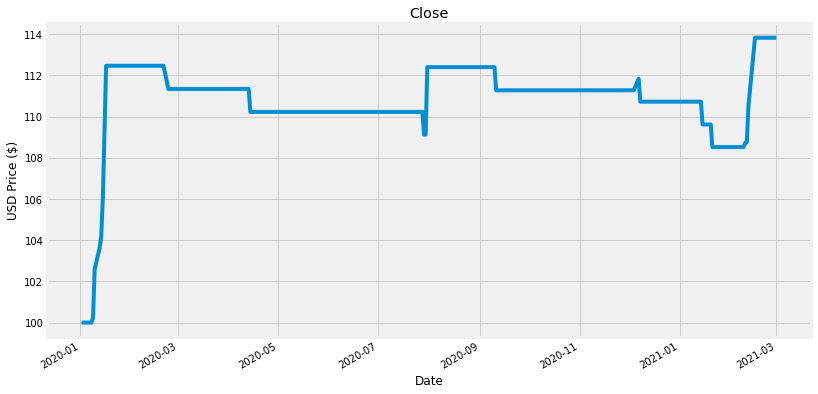

In [ ]:
#Visually show the close price
df['Equity'].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('Close')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

In [ ]:
df2['Close_100'] = 100*df2['Close']/df2['Close'][0]
df2

,High,Low,Open,Close,Volume,Adj Close,Close_100
Date,,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,100.000000
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,99.294013
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,99.644856
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,99.365527
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,99.852662
...,...,...,...,...,...,...,...
2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,119.139003
2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,120.491423
2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,117.541936


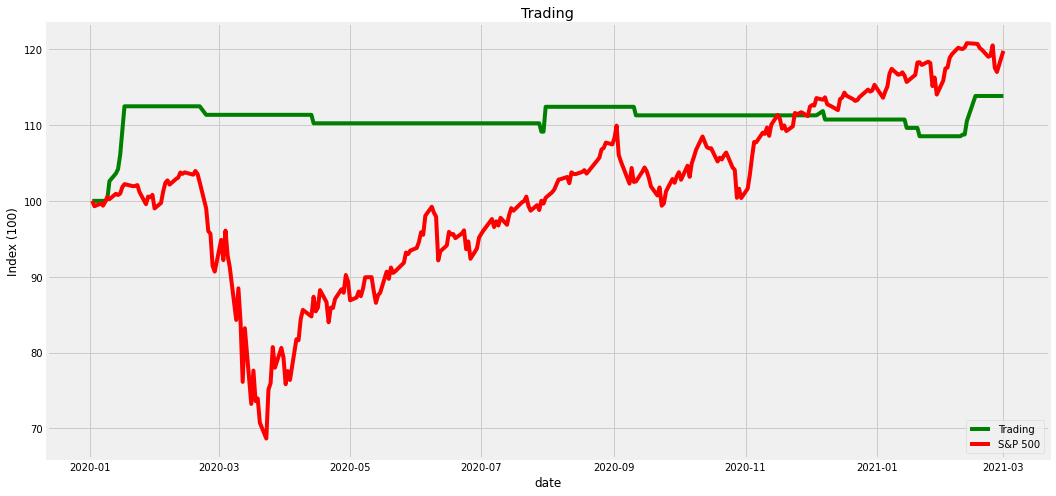

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Trading')
plt.plot(df['Equity'], color='green')
plt.plot(df2['Close_100'], color='red')
plt.xlabel('date')
plt.ylabel('Index (100)')
plt.legend(['Trading', 'S&P 500'],loc='lower right',)
plt.show()

In [ ]:
df['log-return'] = np.log(df['Equity']).diff()
ret = 252 * df['log-return'].mean()
print(ret)
vol = (252 ** 0.5) * df['log-return'].std()
print(vol)
sharpe_ratio = (ret-0.01)/vol
print(sharpe_ratio)

0.11212257222304084
0.06850346857387046
1.4907649838623478


In [ ]:
df2['log-return'] = np.log(df2['Close']).diff()
ret2 = 252 * df2['log-return'].mean()
print(ret2)
vol2 = (252 ** 0.5) * df2['log-return'].std()
print(vol2)
sharpe_ratio2 = (ret2-0.01)/vol2
print(sharpe_ratio2)

0.15620157639710744
0.3287655246837769
0.44469862385276376
